In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [2]:
def open_img(image_path):
    # Open the image file
    image = Image.open(image_path)
    
    # Display the image using Matplotlib
    plt.imshow(image)
    plt.axis('off')
    plt.show()

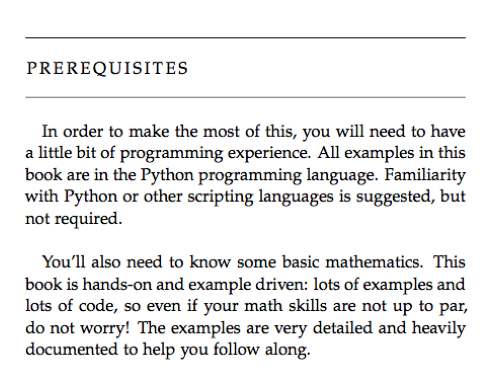

In [3]:
open_img(os.path.join(os.getcwd(), "img", 'sample_1.png'))

# Testing Pytesseract

In [4]:
image_path = os.path.join(os.getcwd(), "img", 'sample_1.png')
image = Image.open(image_path)
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

PREREQUISITES

In order to make the most of this, you will need to have
a little bit of programming experience. All examples in this
book are in the Python programming language. Familiarity
with Python or other scripting languages is suggested, but
not required.

You'll also need to know some basic mathematics. This
book is hands-on and example driven: lots of examples and
lots of code, so even if your math skills are not up to par,
do not worry! The examples are very detailed and heavily
documented to help you follow along.



In [5]:
image_path = os.path.join(os.getcwd(), "img", 'sample_2.png')
image = Image.open(image_path)
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.



In [6]:
image_path = os.path.join(os.getcwd(), "img", 'sample_3.png')
image = Image.open(image_path)
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

Board A

Board A contains
Some Text,

That goes

Here

Some spaces and
then text again

Board B

Board B has

some text

too

but sparse.

Board C

Board C is wide and contains text with
white spaces

<end>




# Pytesseract Default

In [7]:
def is_close_and_similar_size(bbox1, bbox2, max_distance=50, size_ratio=0.5):
    # Calculate the center points of the bounding boxes
    x1_center = (bbox1[0] + bbox1[2]) / 2
    y1_center = (bbox1[1] + bbox1[3]) / 2
    x2_center = (bbox2[0] + bbox2[2]) / 2
    y2_center = (bbox2[1] + bbox2[3]) / 2

    # Calculate the Euclidean distance between the centers
    distance = np.sqrt((x2_center - x1_center) ** 2 + (y2_center - y1_center) ** 2)
    
    # Check if the sizes of the bounding boxes are similar
    size1 = (bbox1[2] - bbox1[0]) * (bbox1[3] - bbox1[1])
    size2 = (bbox2[2] - bbox2[0]) * (bbox2[3] - bbox2[1])
    size_similarity = min(size1, size2) / max(size1, size2)
    
    # Return True if they are close and of similar size
    return distance < max_distance and size_similarity > size_ratio

0 0 1152 648
139 91 73 16
139 91 73 16
139 91 73 16
139 91 53 16
198 92 14 15
137 144 159 100
138 144 158 48
139 144 157 16
139 144 53 16
195 140 10 30
218 145 78 15
138 173 105 19
138 173 52 15
196 173 47 19
137 200 90 20
137 200 90 20
137 200 41 16
184 205 43 15
139 229 44 15
139 229 44 15
139 229 44 15
137 284 161 48
137 284 161 48
138 284 160 20
138 285 52 15
197 289 61 15
265 284 33 16
137 312 143 20
137 312 43 16
186 314 38 14
231 313 49 19
465 197 71 16
465 197 71 16
465 197 71 16
465 197 53 16
526 198 10 15
473 259 108 16
473 259 108 16
473 259 108 16
473 259 53 16
534 260 10 15
551 259 30 16
472 317 94 14
472 317 94 14
472 317 94 14
472 320 50 11
528 317 38 14
471 373 31 14
471 373 31 14
471 373 31 14
471 373 31 14
472 427 102 20
472 427 102 20
472 427 102 20
472 427 30 16
509 432 65 15
736 74 71 16
736 74 71 16
736 74 71 16
736 74 53 16
796 75 11 15
735 130 360 48
735 130 360 48
736 130 359 16
736 130 53 16
792 126 8 30
813 131 13 15
833 130 45 16
885 130 33 16
925 131 78 15


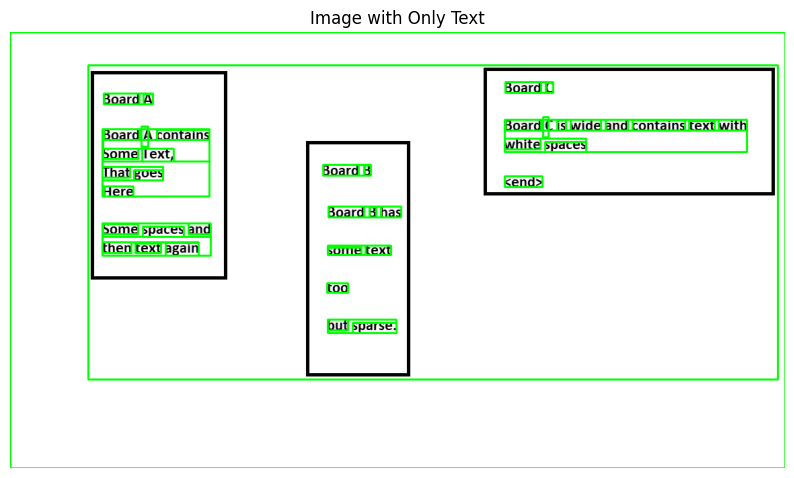

In [8]:
image_path = os.path.join(os.getcwd(), "img", 'sample_3.png')
image = cv2.imread(image_path)

d = pytesseract.image_to_data(image, output_type=Output.DICT)

n_boxes = len(d['level'])

mask = np.zeros_like(image)

for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    print(x,y,w,h)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with only the words
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Image with Only Text')
plt.axis('off')
plt.show()

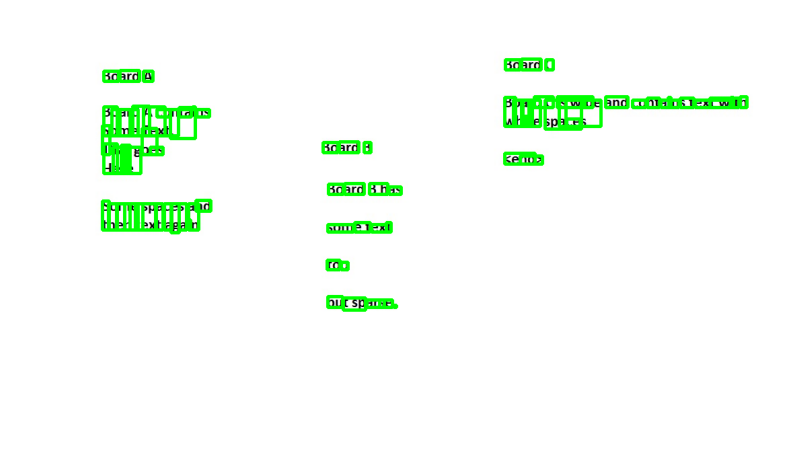

In [9]:
image_path = os.path.join(os.getcwd(), "img", 'sample_4.png')
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# inverse binary
th = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# find contours and sort them from left to right
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=lambda x: [cv2.boundingRect(x)[0], cv2.boundingRect(x)[1]])

merged_contours = []
used = [False] * len(contours)

for i, c1 in enumerate(contours):
    if used[i]:
        continue
    x1, y1, w1, h1 = cv2.boundingRect(c1)
    bbox1 = [x1, y1, x1 + w1, y1 + h1]
    
    for j, c2 in enumerate(contours[i+1:], start=i+1):
        if used[j]:
            continue
        x2, y2, w2, h2 = cv2.boundingRect(c2)
        bbox2 = [x2, y2, x2 + w2, y2 + h2]
        
        if is_close_and_similar_size(bbox1, bbox2, max_distance=50, size_ratio=0.5):
            # Merge the bounding boxes by taking the minimum and maximum coordinates
            x_min = min(bbox1[0], bbox2[0])
            y_min = min(bbox1[1], bbox2[1])
            x_max = max(bbox1[2], bbox2[2])
            y_max = max(bbox1[3], bbox2[3])
            
            # Update the bounding box
            bbox1 = [x_min, y_min, x_max, y_max]
            
            # Mark the second contour as used
            used[j] = True
    
    merged_contours.append(bbox1)
    used[i] = True

# Initialize dictionary for merged groups
board_dictionary = {}

# Iterate through merged bounding boxes and process each group
for i, bbox in enumerate(merged_contours):
    x, y, x2, y2 = bbox
    w, h = x2 - x, y2 - y
    crop_img = image[y:y+h, x:x+w]

    # Use pytesseract to extract text from the cropped image
    data = pytesseract.image_to_data(crop_img, output_type=pytesseract.Output.DICT)
    
    results = []
    for j in range(len(data['text'])):
      if int(data['conf'][j]) > 0:  # Filter out low-confidence detections
        bx, by, bw, bh = data['left'][j], data['top'][j], data['width'][j], data['height'][j]
        text = data['text'][j]
        bbox = [(bx, by), (bx + bw, by), (bx + bw, by + bh), (bx, by + bh)]  # Bounding box as a list of four points
        results.append((bbox, text, float(data['conf'][j])))

    # Collect text results from the cropped image
    board_text = [text for (_, text, _) in results]
    
    # Convert list of words to a single string
    board_para = ' '.join(board_text)

    # Store string within a dictionary
    board_dictionary[str(i)] = board_para

# Visualize the results with bounding boxes around detected text groups
img2 = image.copy()
for i, bbox in enumerate(merged_contours):
    x, y, x2, y2 = bbox
    img2 = cv2.rectangle(img2, (x, y), (x2, y2), (0, 255, 0), 3)

# Display the final image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [10]:
def get_contour_center(contour):
    moments = cv2.moments(contour)
    if moments['m00'] != 0:
        cx = int(moments['m10'] / moments['m00'])
        cy = int(moments['m01'] / moments['m00'])
        return (cx, cy)
    return None


# Clustering

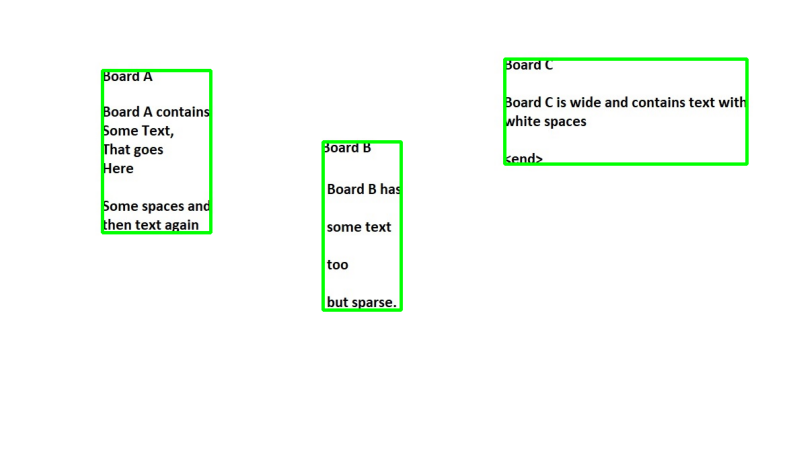

[['Board', 'A', 'Board', 'A', 'contains', 'Some', 'Text,', 'That', 'goes', 'Here', 'Some', 'spaces', 'and', 'then', 'text', 'again'], ['Board', 'B', 'Board', 'B', 'has', 'some', 'text', 'too', 'but', 'sparse.'], ['Board', 'C', 'Board', 'C', 'is', 'wide', 'and', 'contains', 'text', 'with', 'white', 'spaces', '<end>']]


In [11]:
image_path = os.path.join(os.getcwd(), "img", 'sample_4.png')
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# inverse binary
th = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]

# find contours and sort them from left to right
contours, hierarchy = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=lambda x: [cv2.boundingRect(x)[0], cv2.boundingRect(x)[1]])

centroids = []
bounding_boxes = []

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cx = x + w / 2
    cy = y + h / 2
    centroids.append([cx, cy])
    bounding_boxes.append([x, y, w, h])

# Step 2: Apply DBSCAN Clustering
centroids = np.array(centroids)
clustering = DBSCAN(eps=100, min_samples=1).fit(centroids)

# Step 3: Merge bounding boxes within the same cluster
clustered_bboxes = []
for cluster_id in np.unique(clustering.labels_):
    cluster_indices = np.where(clustering.labels_ == cluster_id)[0]
    cluster_boxes = np.array([bounding_boxes[i] for i in cluster_indices])

    x_min = np.min(cluster_boxes[:, 0])
    y_min = np.min(cluster_boxes[:, 1])
    x_max = np.max(cluster_boxes[:, 0] + cluster_boxes[:, 2])
    y_max = np.max(cluster_boxes[:, 1] + cluster_boxes[:, 3])

    clustered_bboxes.append([x_min, y_min, x_max - x_min, y_max - y_min])

# Initialize dictionary for merged groups
board_dictionary = {}

# Iterate through merged bounding boxes and process each group
for i, (x, y, w, h) in enumerate(clustered_bboxes):
    crop_img = image[y:y+h, x:x+w]

    # Use pytesseract to extract text from the cropped image
    data = pytesseract.image_to_data(crop_img, output_type=pytesseract.Output.DICT)
    
    results = []
    for j in range(len(data['text'])):
      if int(data['conf'][j]) > 0:  # Filter out low-confidence detections
        bx, by, bw, bh = data['left'][j], data['top'][j], data['width'][j], data['height'][j]
        text = data['text'][j]
        bbox = [(bx, by), (bx + bw, by), (bx + bw, by + bh), (bx, by + bh)]  # Bounding box as a list of four points
        results.append((bbox, text, float(data['conf'][j])))

    # Collect text results from the cropped image
    board_text = [text for (_, text, _) in results]
    
    # Convert list of words to a single string
    board_para = ' '.join(board_text)

    # Store string within a dictionary
    board_dictionary[str(i)] = board_para

# Visualize the results with bounding boxes around detected text groups
img2 = image.copy()
for (x, y, w, h) in clustered_bboxes:
    img2 = cv2.rectangle(img2, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the final image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

grouped_words = []

for i, (x, y, w, h) in enumerate(clustered_bboxes):
    crop_img = image[y:y+h, x:x+w]

    # Use pytesseract to extract text from the cropped image
    data = pytesseract.image_to_data(crop_img, output_type=pytesseract.Output.DICT)
    
    results = []
    for j in range(len(data['text'])):
      if int(data['conf'][j]) > 0:  # Filter out low-confidence detections
        bx, by, bw, bh = data['left'][j], data['top'][j], data['width'][j], data['height'][j]
        text = data['text'][j]
        bbox = [(bx, by), (bx + bw, by), (bx + bw, by + bh), (bx, by + bh)]  # Bounding box as a list of four points
        results.append((bbox, text, float(data['conf'][j])))

    # Collect text results from the cropped image
    board_text = [text for (_, text, _) in results]

    # Store the list of words in the array
    grouped_words.append(board_text)

print(grouped_words)

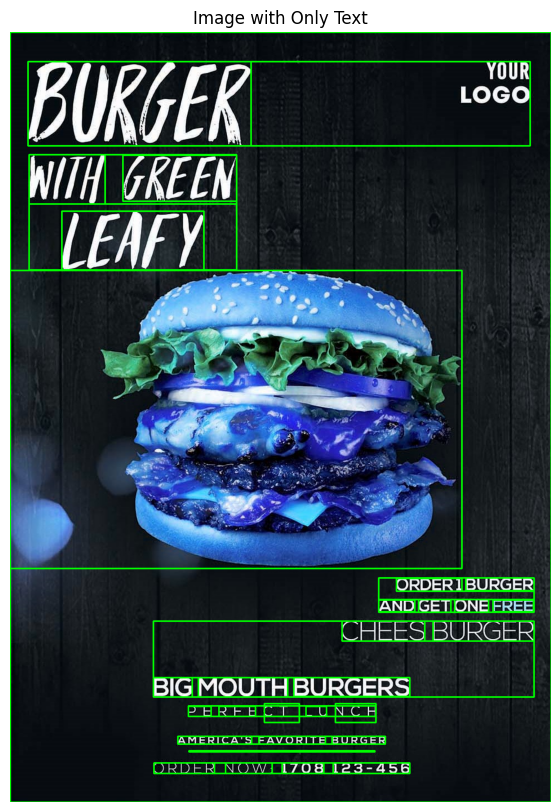

In [16]:
image_path = os.path.join(os.getcwd(), "img", 'sample_5.png')
image = cv2.imread(image_path)

d = pytesseract.image_to_data(image, output_type=Output.DICT)

n_boxes = len(d['level'])

mask = np.zeros_like(image)

for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with only the words
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title('Image with Only Text')
plt.axis('off')
plt.show()

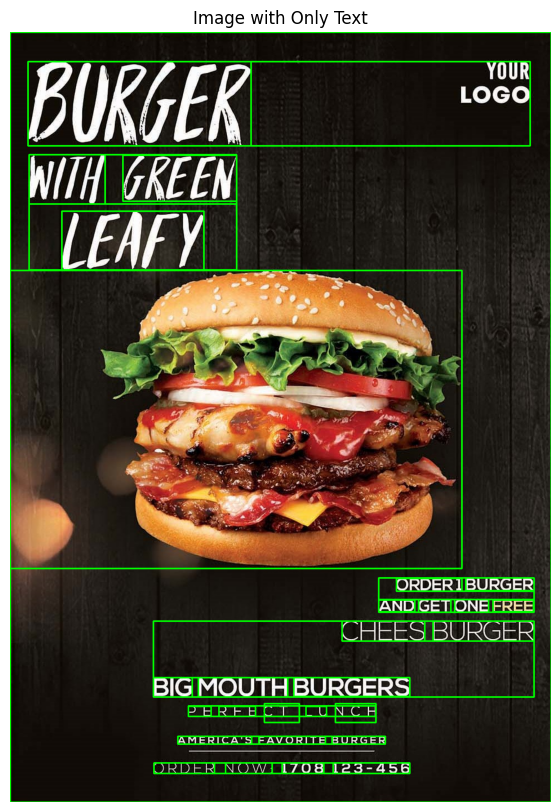

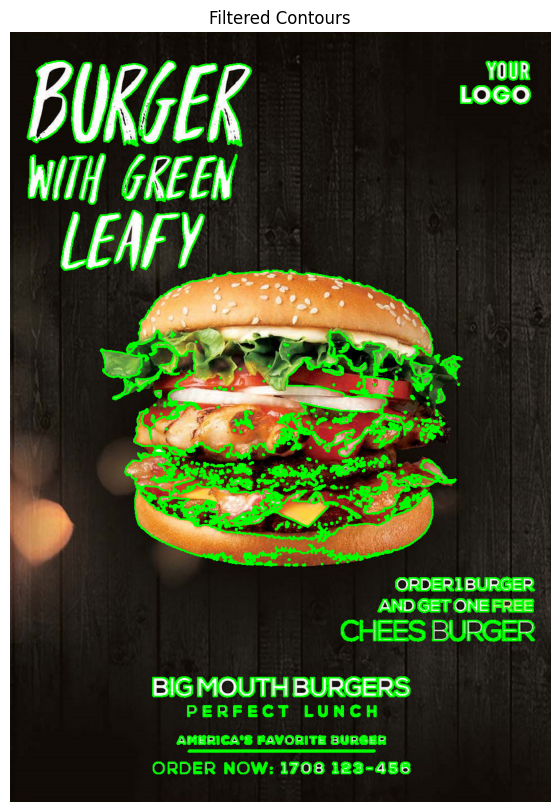

In [14]:
# Load image
image_path = os.path.join(os.getcwd(), "img", 'sample_5.png')
image = cv2.imread(image_path)

# Get text data from pytesseract
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])

# Draw bounding boxes from pytesseract
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    if w > 10 and h > 10:  # Filter out very small bounding boxes
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with only the words
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Only Text')
plt.axis('off')
plt.show()

# Optional: Perform additional filtering to remove large contours
# Load image again to get contours
gray = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2GRAY)
th = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
contours, hierarchy = cv2.findContours(th, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours
filtered_contours = []
for i, contour in enumerate(contours):
    if hierarchy[0][i][3] != -1:  # Skip top-level contours
        x, y, w, h = cv2.boundingRect(contour)
        if w < image.shape[1] * 0.8 and h < image.shape[0] * 0.8:  # Filter out large contours
            filtered_contours.append(contour)

# Draw filtered contours
img_with_filtered_contours = cv2.drawContours(np.copy(cv2.imread(image_path)), filtered_contours, -1, (0, 255, 0), 2)

# Display the image with filtered contours
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_filtered_contours, cv2.COLOR_BGR2RGB))
plt.title('Filtered Contours')
plt.axis('off')
plt.show()


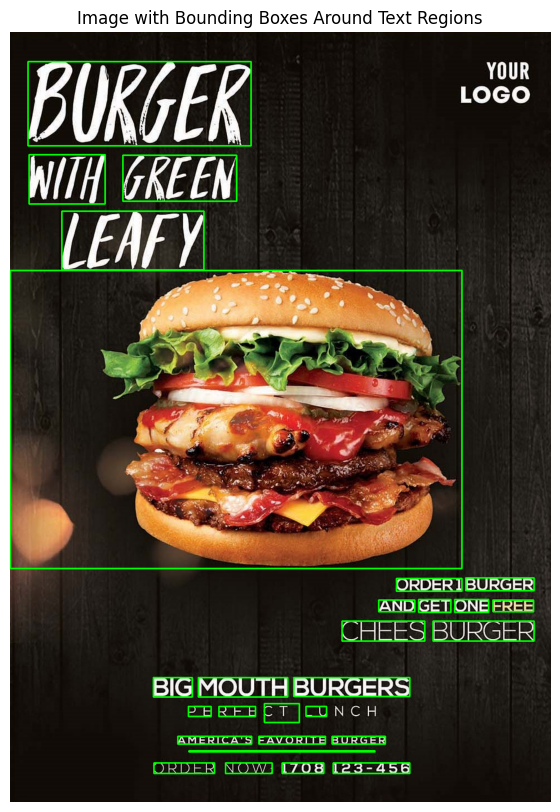

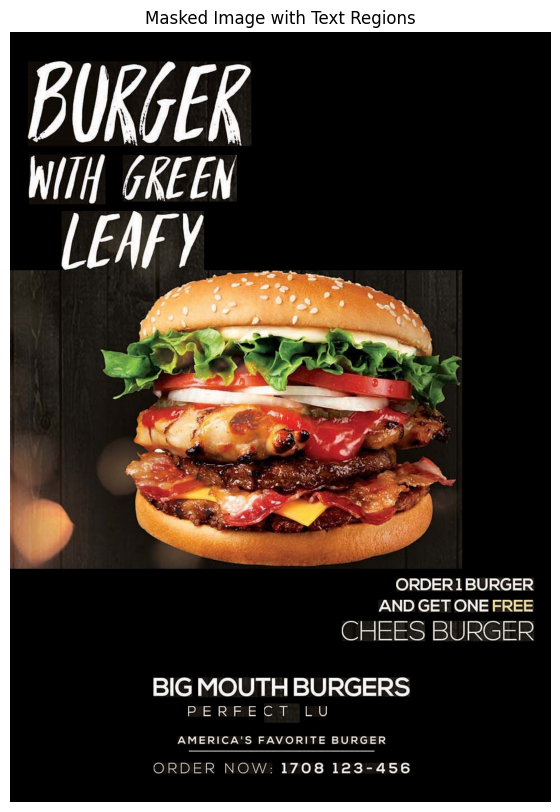

In [15]:
# Load image
image_path = os.path.join(os.getcwd(), "img", 'sample_5.png')
image = cv2.imread(image_path)

# Get text data from pytesseract
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])

# Create a copy of the image to draw rectangles on
image_with_boxes = image.copy()

# Draw rectangles around text regions
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    if int(d['conf'][i]) > 0:  # Filter out low-confidence detections
        cv2.rectangle(image_with_boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with bounding boxes around text regions
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Image with Bounding Boxes Around Text Regions')
plt.axis('off')
plt.show()

# Create a mask with the same size as the input image
mask = np.zeros_like(gray)

# Fill the mask with text regions
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    if int(d['conf'][i]) > 0:  # Filter out low-confidence detections
        cv2.rectangle(mask, (x, y), (x + w, y + h), 255, -1)  # Fill text regions with white

# Convert mask to binary
binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)[1]

# Apply the mask to the original image
masked_image = cv2.bitwise_and(image, image, mask=binary_mask)

# Display the masked image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
plt.title('Masked Image with Text Regions')
plt.axis('off')
plt.show()

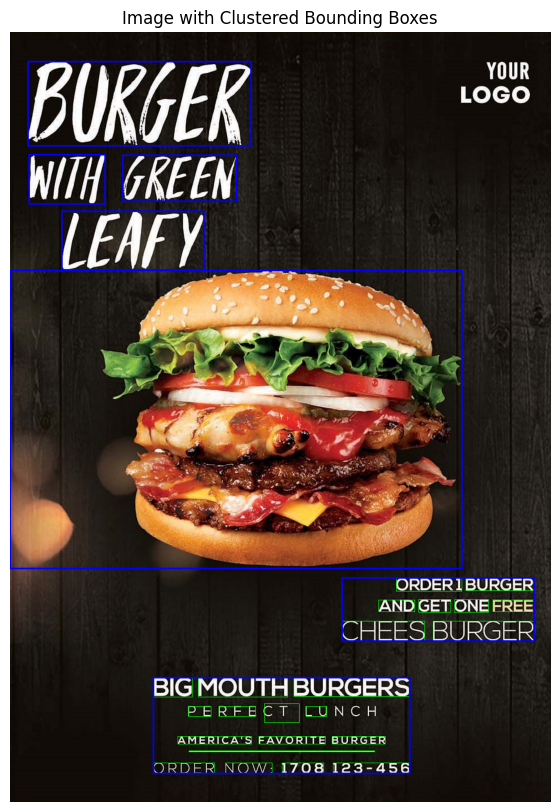

Cluster 0: [[ 32  53 434 205]]
Cluster 1: [[ 34 221 171 310]]
Cluster 2: [[203 222 408 305]]
Cluster 3: [[ 93 323 349 429]]
Cluster 4: [[  0 430 814 968]]
Cluster 5: [[ 696  986  814 1009]
 [ 821  985  944 1008]
 [ 664 1025  729 1046]
 [ 736 1024  794 1047]
 [ 801 1024  862 1047]
 [ 870 1025  943 1046]
 [ 598 1063  747 1099]
 [ 762 1063  944 1099]]
Cluster 6: [[ 258 1165  328 1200]
 [ 339 1165  500 1200]
 [ 511 1165  720 1199]
 [ 321 1217  362 1235]
 [ 376 1217  442 1235]
 [ 458 1212  521 1246]
 [ 533 1217  570 1235]
 [ 302 1271  435 1285]
 [ 448 1271  568 1285]
 [ 580 1271  676 1285]
 [ 322 1297  657 1299]
 [ 259 1319  368 1338]
 [ 388 1319  472 1338]
 [ 490 1319  565 1338]
 [ 582 1319  720 1338]]


In [39]:
# Load the image
image_path = os.path.join(os.getcwd(), "img", 'sample_5.png')
image = cv2.imread(image_path)

# Get text data from pytesseract
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])

# Create an array to store bounding box coordinates
boxes = []
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    if int(d['conf'][i]) > 0:  # Filter out low-confidence detections
        boxes.append([x, y, x + w, y + h])

boxes = np.array(boxes)

# Compute the centers of bounding boxes for clustering
centers = np.array([[ (x1 + x2) // 2, (y1 + y2) // 2 ] for (x1, y1, x2, y2) in boxes])

# Apply DBSCAN clustering with adjusted `eps`
eps = 100  # Adjust this value to control the proximity of clusters
min_samples = 1
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(centers)

# Create an image to visualize bounding boxes and clusters
image_with_boxes = image.copy()

# Draw original bounding boxes
for (x1, y1, x2, y2) in boxes:
    cv2.rectangle(image_with_boxes, (x1, y1), (x2, y2), (0, 255, 0), 1)  # Green for original boxes

# Draw clustered bounding boxes
unique_labels = set(labels)
for label in unique_labels:
    if label == -1:
        continue  # Skip noise
    cluster_points = boxes[labels == label]
    x_min = np.min(cluster_points[:, 0])
    y_min = np.min(cluster_points[:, 1])
    x_max = np.max(cluster_points[:, 2])
    y_max = np.max(cluster_points[:, 3])
    cv2.rectangle(image_with_boxes, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Blue for clusters

# Display the image with clustered bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Image with Clustered Bounding Boxes')
plt.axis('off')
plt.show()

# Print out the coordinates of each cluster
for label in unique_labels:
    if label == -1:
        continue  # Skip noise
    cluster_points = boxes[labels == label]
    print(f"Cluster {label}: {cluster_points}")